In [ ]:
#Make a window

def sliding_window(signal, fs, window_seconds=8, overlap=0.5):
    length = int(fs*window_seconds)
    step = int((length*(1-overlap)))

    windows = []
    for start in range(0, len(signal)-length+1, step):
        windows.append(signal[start : start+length])

    return windows

: 

In [ ]:
def hr_estimation(peaks, fs):
    hr = np.zeros_like(peaks)
    for peak in range(len(peaks)-1):
        hr[peak] = 60/((peaks[peak+1]-peaks[peak])/fs)
    hr = hr[:-1]
    avg_hr = np.sum(hr)/len(hr)
    return avg_hr

# **Load and find peaks of WildPPG signal**

In [ ]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

file = loadmat('../data/raw/WildPPG_Part_an0.mat', struct_as_record = False, squeeze_me = True)

ppg_wrist_g = file['wrist'].ppg_g
ppg_wrist_r = file['wrist'].ppg_r
ppg_wrist_ir = file['wrist'].ppg_ir
ecg_bpm = file['sternum'].ecg

fs = ppg_wrist_g.fs
descr_wrist_g = ppg_wrist_g.descr
descr_wrist_r = ppg_wrist_r.descr
descr_wrist_ir = ppg_wrist_ir.descr

signal_wrist_g = ppg_wrist_g.v
signal_wrist_r = ppg_wrist_r.v
signal_wrist_ir = ppg_wrist_ir.v
signal_ecg = ecg_bpm.v

signal_wrist_total = signal_wrist_g + signal_wrist_r + signal_wrist_ir

bpm_descr = ecg_bpm.descr
signal_bpm = ecg_bpm.v

t = 1/fs
n = len(signal_wrist_g)
time = np.linspace(0, (n-1)*t, n)
window_values = signal_wrist_total[:fs*15]
window_time = time[:fs*15]

window_ecg = signal_ecg[:fs*15]

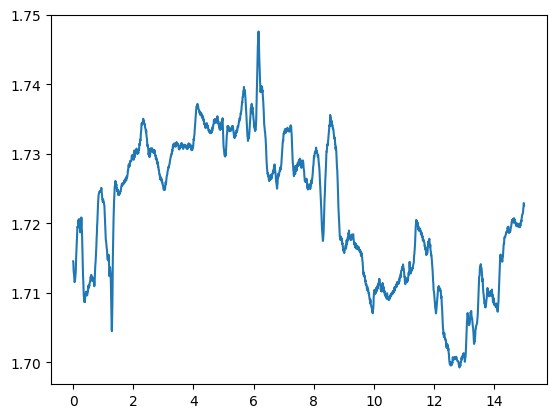

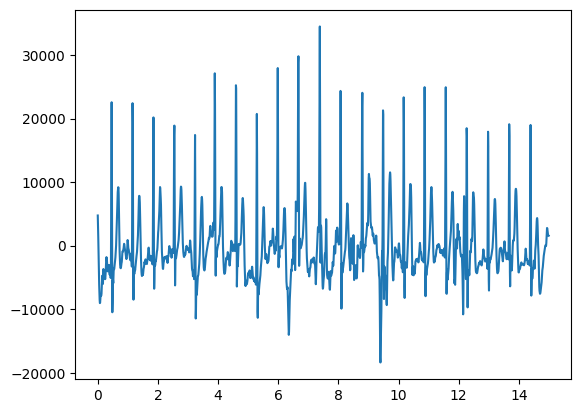

In [ ]:
plt.figure()
plt.plot(window_time, window_values)

plt.figure()
plt.plot(window_time, window_ecg)
plt.show()

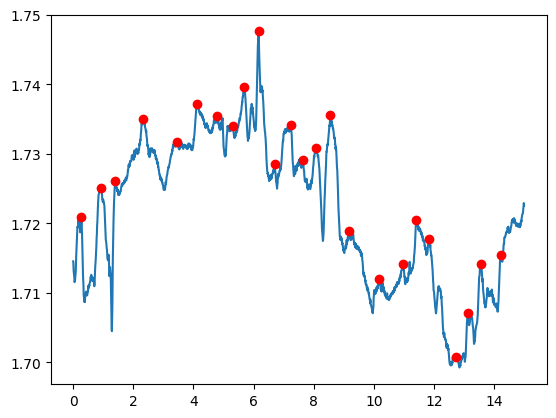

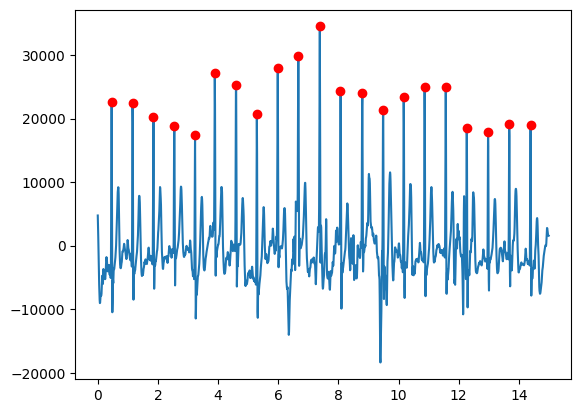

In [ ]:
peaks, props = find_peaks(window_values, distance=fs*0.34, prominence=0.001, height=1)
ecg_peaks, ecg_props = find_peaks(window_ecg, distance=fs*0.34, prominence=0.2, height=10000)

plt.figure()
plt.plot(window_time, window_values, label="PPG")
plt.plot(window_time[peaks], window_values[peaks], 'ro', label="Peaks")

plt.figure()
plt.plot(window_time, window_ecg, label="ECG")
plt.plot(window_time[ecg_peaks], window_ecg[ecg_peaks], 'ro')

plt.show()

In [ ]:
HR = np.zeros_like(peaks)
for peak in range(len(peaks)-1):
    HR[peak] = 60/((peaks[peak+1] - peaks[peak])/fs)

HR = HR[:-1]
avg_hr = np.sum(HR)/len(HR)
print(avg_hr)

ecg_HR = np.zeros_like(ecg_peaks)
for peak in range(len(ecg_peaks)-1):
    ecg_HR[peak] = 60/((ecg_peaks[peak+1] - ecg_peaks[peak])/fs)

ecg_HR = ecg_HR[:-1]
avg_ecg_hr = np.sum(ecg_HR)/len(ecg_HR)
print(avg_ecg_hr)

108.95652173913044
85.85


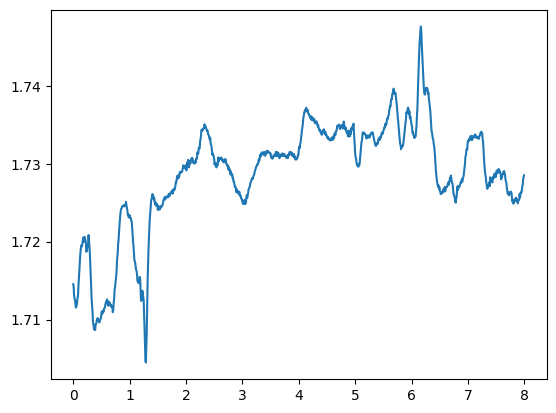

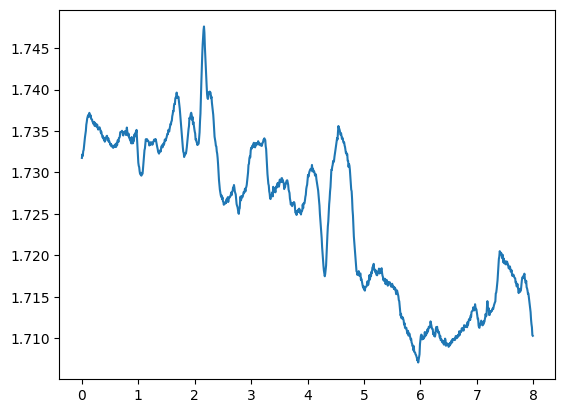

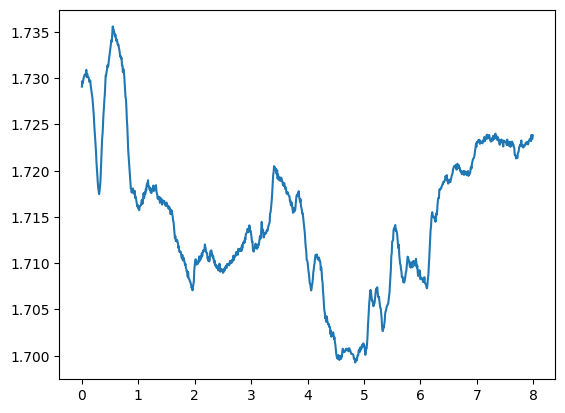

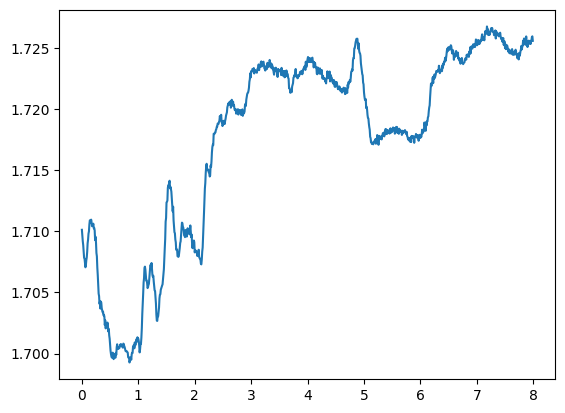

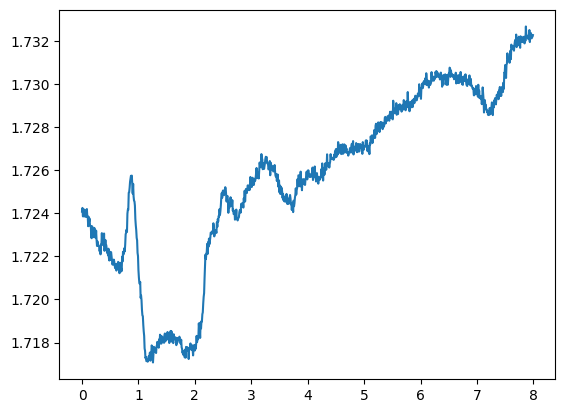

In [ ]:
seconds = 8
windowed_ppg = sliding_window(signal_wrist_total, fs=fs, window_seconds=seconds, overlap=0.5)
windowed_time = time[:fs*seconds]

for window in range(5):
    plt.figure()
    plt.plot(windowed_time, windowed_ppg[window])

# **Kaggle example**

In [ ]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np

file = loadmat('../data/raw/part_1.mat', struct_as_record = False, squeeze_me = True)

In [ ]:
ppg_1 = file['p'][0][0]
abp_1 = file['p'][0][1]
ecg_1 = file['p'][0][2]

fs = 125
delta_t = 1/fs
N_1 = len(ppg_1)
time_1 = np.linspace(0, N_1*delta_t, N_1)

ppg_window = ppg_1[:fs*10]
ecg_window = ecg_1[:fs*10]
abp_window = abp_1[:fs*10]
time_window = time[:fs*10]

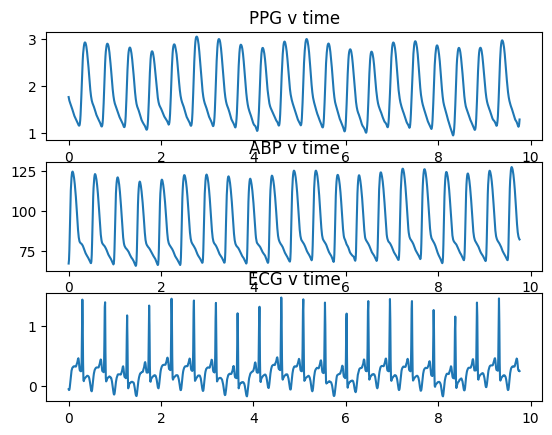

In [ ]:
plt.figure()
plt.subplot(3,1,1)
plt.plot(time_window, ppg_window)
plt.title('PPG v time')

plt.subplot(3,1,2)
plt.plot(time_window, abp_window)
plt.title('ABP v time')

plt.subplot(3,1,3)
plt.plot(time_window, ecg_window)
plt.title('ECG v time')

plt.show()

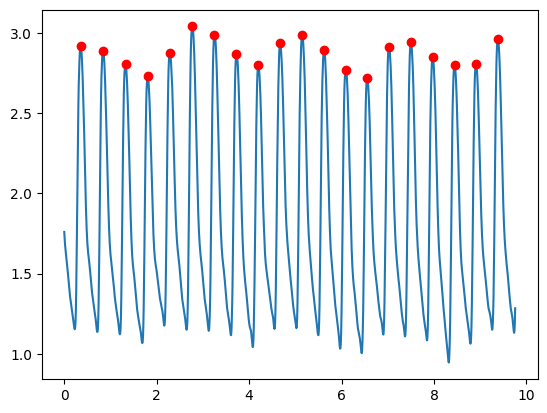

In [ ]:
from sqis.calculation import systolic

marker_values, marker_time = systolic_peaks(ppg_window, time_window, fs=fs, prominence=0.2, height=2.5)

plt.figure()
plt.plot(time_window, ppg_window)
plt.plot(marker_time, marker_values, 'ro')
plt.show()

In [ ]:
ppg_window = sliding_window(ppg_1, fs, 8, 0.5)
ecg_window = sliding_window(ecg_1, fs, 8, 0.5)
time_window = time_1[:fs*8]

print(0 in ecg_window[0]) 
ppg_hr = hr_estimation(ppg_window[0], fs)
ecg_hr = hr_estimation(ecg_window[0], fs)

print(ppg_hr, ecg_hr)

# for window in range(5):
#     plt.figure()
#     plt.plot(time_window, ppg_window[window])
# plt.show()

False
inf inf


C:\Users\robik\AppData\Local\Temp\ipykernel_27772\262287054.py:4: RuntimeWarning: divide by zero encountered in scalar divide
  hr[peak] = 60/((peaks[peak+1]-peaks[peak])/fs)
